# Lab 1 Visualizing Real Data Sets using Matplotlib -Telmen Enkhtuvshin

This is a dataset of Individual Household Electric Power Consumption in one household with one-minute interval sampling rate collected for over 4 years.
The data variables include date, time, global active power, global reactive power, global intensity, submetering 1, 2, 3 that corresponds to different sections of the house that uses different electrical appliances. The insights about this data will be explored below. The corresponding units are displayed for reference.

```
date                  - day/month/year
time                  - hour:minute:second
global active power   - kW (kiloWatt)
global reactive power - kW (kiloWatt)
global intensity      - A (amperes)
submetering 1         - Wh (watt-hour)
submetering 2         - Wh (watt-hour)
submetering 3         - Wh (watt-hour)
```

In [63]:
from ucimlrepo import fetch_ucirepo 
from pprint import pprint
  
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 
y = individual_household_electric_power_consumption.data.targets 
  
# metadata 
pprint(individual_household_electric_power_consumption.metadata) 
  
# variable information 
print(individual_household_electric_power_consumption.variables) 


/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'abstract': 'Measurements of electric power consumption in one household with '
             'a one-minute sampling rate over a period of almost 4 years. '
             'Different electrical quantities and some sub-metering values are '
             'available.',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'This archive contains 2075259 measurements '
                                'gathered in a house located in Sceaux (7km of '
                                'Paris, France) between December 2006 and '
                                'November 2010 (47 months).\r\n'
                                'Notes: \r\n'
                                '1.(global_active_power*1000/60 - '

Below is the sample data given below to take a glimpse into the dataset.

In [64]:
X.head(100)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
95,16/12/2006,18:59:00,4.224,0.090,231.960,18.200,0.000,1.000,16.0
96,16/12/2006,19:00:00,4.070,0.088,231.990,17.400,0.000,1.000,17.0
97,16/12/2006,19:01:00,3.612,0.090,232.360,15.600,0.000,2.000,16.0
98,16/12/2006,19:02:00,3.458,0.090,232.710,14.800,0.000,1.000,17.0


In [65]:
X.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


# Bar Graph

In [76]:
import matplotlib.pyplot as plt
import pandas as pd


# Make sure 'Global_active_power' is numeric
X['Global_active_power'] = pd.to_numeric(X['Global_active_power'], errors='coerce')
X['Energy_kWh'] = X['Global_active_power'] * (1/60)  # kWh per reading

X['Date'] = pd.to_datetime(X['Date'], dayfirst=True)
yearly_sum = X.groupby(X['Date'].dt.year)['Energy_kWh'].sum()
yearly_sum

Date
2006     696.888033
2007    9711.803100
2008    9414.884900
2009    9371.919967
2010    8088.251700
Name: Energy_kWh, dtype: float64

In [69]:
X.tail(100)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075159,2010-11-26,19:23:00,1.070,0.0,239.61,4.4,0.0,0.0,0.0
2075160,2010-11-26,19:24:00,1.120,0.082,238.91,4.6,0.0,0.0,0.0
2075161,2010-11-26,19:25:00,1.126,0.078,237.99,4.8,0.0,0.0,0.0
2075162,2010-11-26,19:26:00,1.264,0.072,237.23,5.4,0.0,0.0,0.0
2075163,2010-11-26,19:27:00,1.260,0.0,236.14,5.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


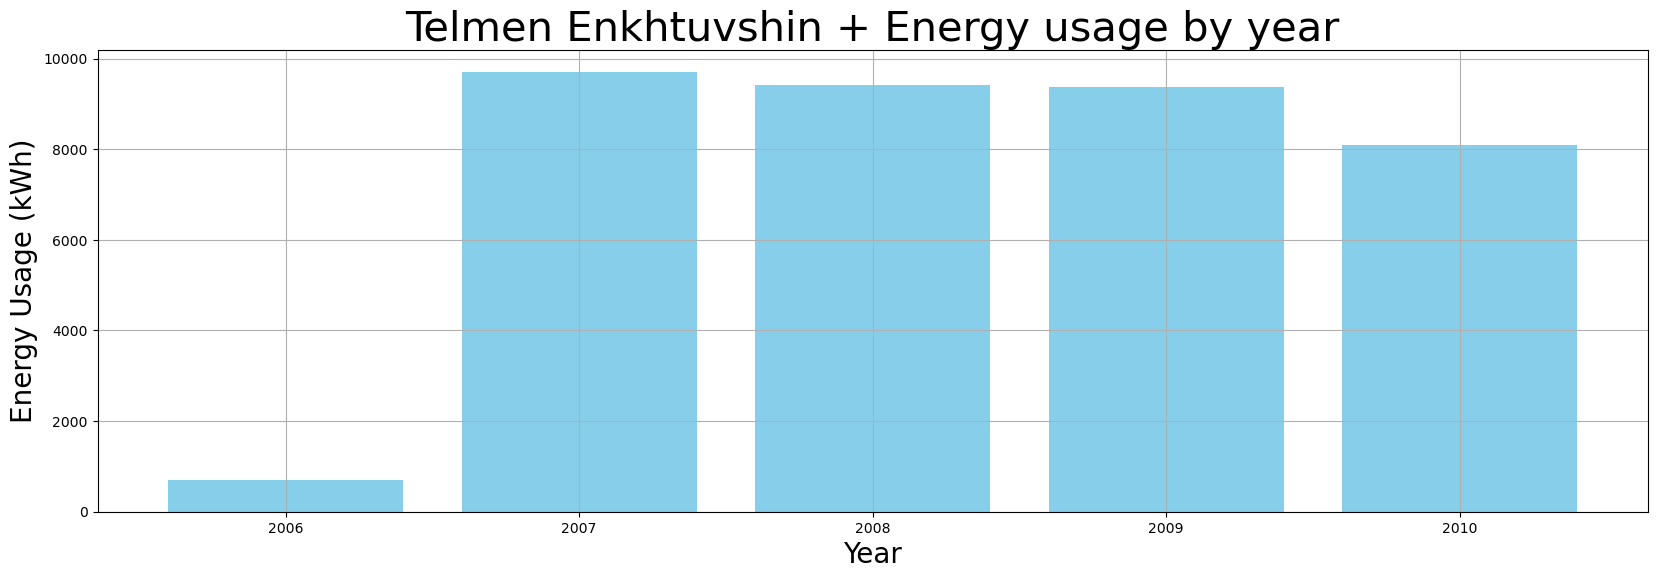

In [141]:
# Plotting
fig = plt.figure(figsize=(20,6))
plt.bar(yearly_sum.index, yearly_sum.values, color='skyblue')

# Make it prettier
plt.xlabel('Year', fontsize=20)
plt.ylabel('Energy Usage (kWh)', fontsize=20)
plt.title('Telmen Enkhtuvshin + Energy usage by year', fontsize=30)
plt.grid()
plt.show()

In [142]:
# Saving plot
fig.savefig("TelmenEnkhtuvshin_EnergyBarChart.png")

From this Bar graph, we can see that electrical power usage goes up from 2006 to 2007, but the data capture first started from mid-2006 so there is no shocking discovery here. Moreover, for years 2007, 2008, and 2009, power usage is similar but decreases year by year with small difference. Lastly in 2010, energy usage drops down but that difference can be explained by the fact that data capture stop around end of November 2010. Overall, yearly energy usage is always below 10,000 kWh.

# Line Graph

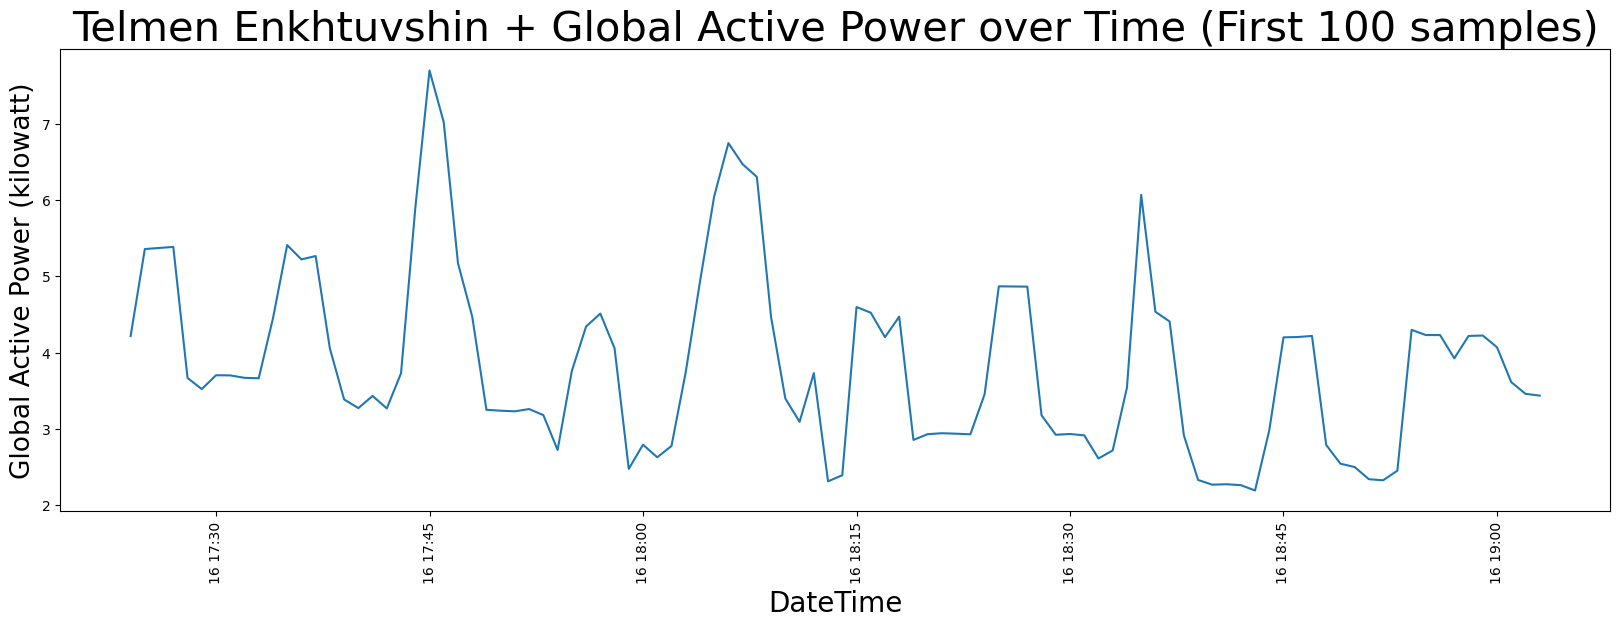

In [143]:
# Combine 'Date' and 'Time' into a single string for x-axis labels
X['DateTime'] = pd.to_datetime(X['Date'].astype(str) + ' ' + X['Time'])

# Make sure the 'Global_active_power' is numeric
X['Global_active_power'] = pd.to_numeric(X['Global_active_power'], errors='coerce')

# Plotting
fig = plt.figure(figsize=(20,6))
plt.plot(X['DateTime'].head(100), X['Global_active_power'].head(100))

# Make it prettier
plt.xticks(rotation=90)
plt.xlabel('DateTime', fontsize=20)
plt.ylabel('Global Active Power (kilowatt)', fontsize=19)
plt.title('Telmen Enkhtuvshin + Global Active Power over Time (First 100 samples)', fontsize=30)
plt.show()



In [144]:
# Saving plot
fig.savefig("TelmenEnkhtuvshin_PowerLineChart.png")

This top Bar Graph shows the first 100 sample Global Active Power used from 16/12/2006 17:24:00 to 19:03:00 of the same day. Usually, the values seems to have a consant horizontal value but ocasionally, the power wattage usage jumps up and comes back down.

In [73]:
X.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
5,2006-12-16,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0,2006-12-16 17:29:00
6,2006-12-16,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0,2006-12-16 17:30:00
7,2006-12-16,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0,2006-12-16 17:31:00
8,2006-12-16,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0,2006-12-16 17:32:00
9,2006-12-16,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0,2006-12-16 17:33:00


# Pie Chart

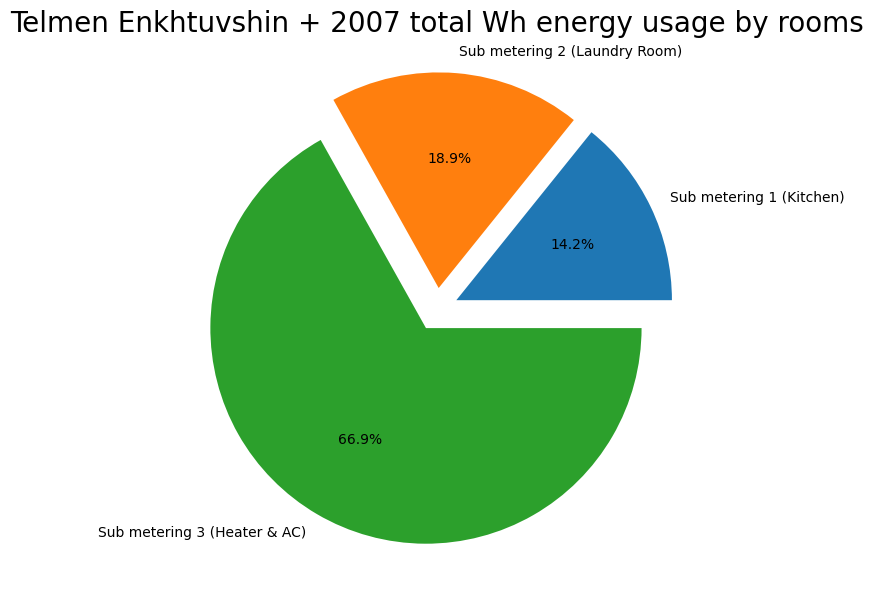

In [145]:
# Make sure the 'Global_active_power' is numeric
X['Sub_metering_1'] = pd.to_numeric(X['Sub_metering_1'], errors='coerce')
X['Sub_metering_2'] = pd.to_numeric(X['Sub_metering_2'], errors='coerce')
X['Sub_metering_3'] = pd.to_numeric(X['Sub_metering_3'], errors='coerce')

Submeter1_Sum_2007 = X.loc[X['Date'].dt.year == 2007, 'Sub_metering_1'].sum()
Submeter2_Sum_2007 = X.loc[X['Date'].dt.year == 2007, 'Sub_metering_2'].sum()
Submeter3_Sum_2007 = X.loc[X['Date'].dt.year == 2007, 'Sub_metering_3'].sum()

xPie = [Submeter1_Sum_2007, Submeter2_Sum_2007, Submeter3_Sum_2007]

labels = ["Sub metering 1 (Kitchen)", "Sub metering 2 (Laundry Room)", "Sub metering 3 (Heater & AC)"]
fig = plt.figure(figsize=(7,7))
explode = [0.1, 0.1, 0.1]

plt.title("Telmen Enkhtuvshin + 2007 total Wh energy usage by rooms", fontsize=20)
plt.pie(xPie, labels=labels, explode=explode, autopct='%1.1f%%');

plt.show()

In [146]:
# Saving plot
fig.savefig("TelmenEnkhtuvshin_RoomPieChart.png")

From this we can see that Heater and AC takes most of the energy usage which makes sense. That is followed by the Lundry room and Kitchen. People need heating in their homes to stay warm and heat is lost all the time by radiation or convection out into the environment. This take 66.9% of energy usage of 2007 for this particular home.

# Box Chart

In [129]:
# Create a new column 'Year'
X['Year'] = X['DateTime'].dt.year

# Select only the needed columns
new_frame = X[['Year', 'Voltage', 'Global_intensity', 'Global_active_power', 'Global_reactive_power']]

# Force numeric conversion (errors='coerce' will turn invalid strings into NaN)
new_frame['Voltage'] = pd.to_numeric(new_frame['Voltage'], errors='coerce')
new_frame['Global_intensity'] = pd.to_numeric(new_frame['Global_intensity'], errors='coerce')
new_frame['Global_active_power'] = pd.to_numeric(new_frame['Global_active_power'], errors='coerce')
new_frame['Global_reactive_power'] = pd.to_numeric(new_frame['Global_reactive_power'], errors='coerce')

# Drop rows where we have NaN values
new_frame = new_frame.dropna(subset=['Voltage', 'Global_intensity', 'Global_active_power', 'Global_reactive_power'])

/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_2688/2752556705.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame['Voltage'] = pd.to_numeric(new_frame['Voltage'], errors='coerce')
/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_2688/2752556705.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame['Global_intensity'] = pd.to_numeric(new_frame['Global_intensity'], errors='coerce')
/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_2688/2752556705.py:10: Settin

This Boxplot shows the range and different quartiles of Voltage and Global Intensity of current.

/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_2688/1040121525.py:4: UserWarning: When passing multiple axes, layout keyword is ignored.
  new_frame.boxplot(column=['Voltage', 'Global_intensity'],
/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_2688/1040121525.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  new_frame.boxplot(column=['Voltage', 'Global_intensity'],


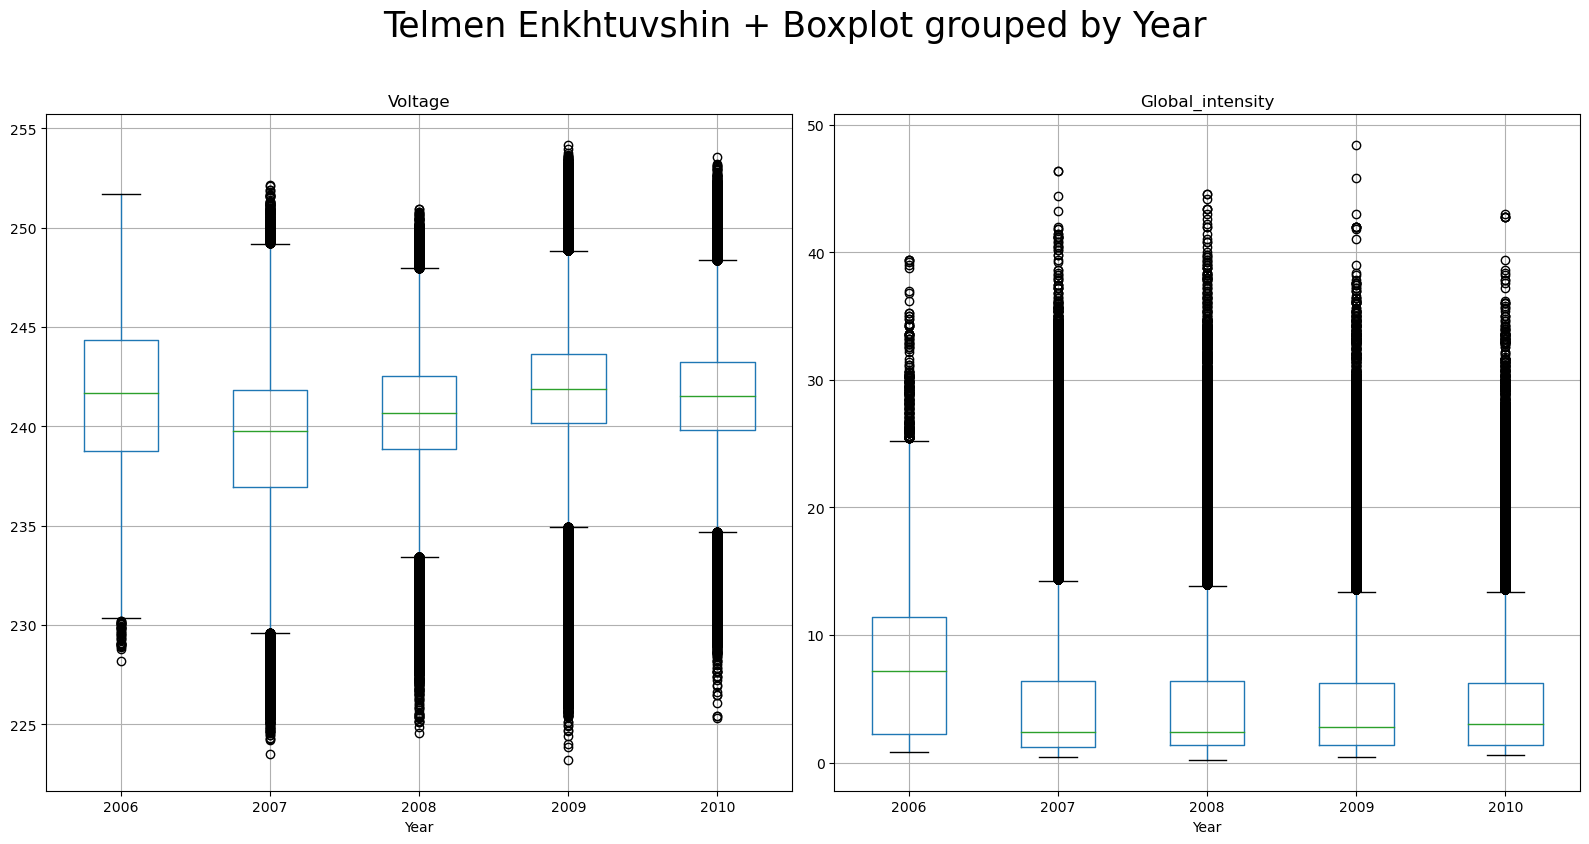

In [148]:
# Separate boxplot of iris attributes for each species
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

new_frame.boxplot(column=['Voltage', 'Global_intensity'],
                  by='Year', 
                  layout=(1, 2),
                  ax=axes);
plt.tight_layout()
plt.suptitle("Telmen Enkhtuvshin + Boxplot grouped by Year", fontsize=25, y=1.05)
plt.show()

In [150]:
# Saving plot
fig.savefig("TelmenEnkhtuvshin_V&Cboxplot.png")

This Boxplot shows the range and different quartiles of Global active power and Global reactive power.

/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_2688/1762828619.py:4: UserWarning: When passing multiple axes, layout keyword is ignored.
  new_frame.boxplot(column=['Global_active_power', 'Global_reactive_power'],
/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_2688/1762828619.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  new_frame.boxplot(column=['Global_active_power', 'Global_reactive_power'],


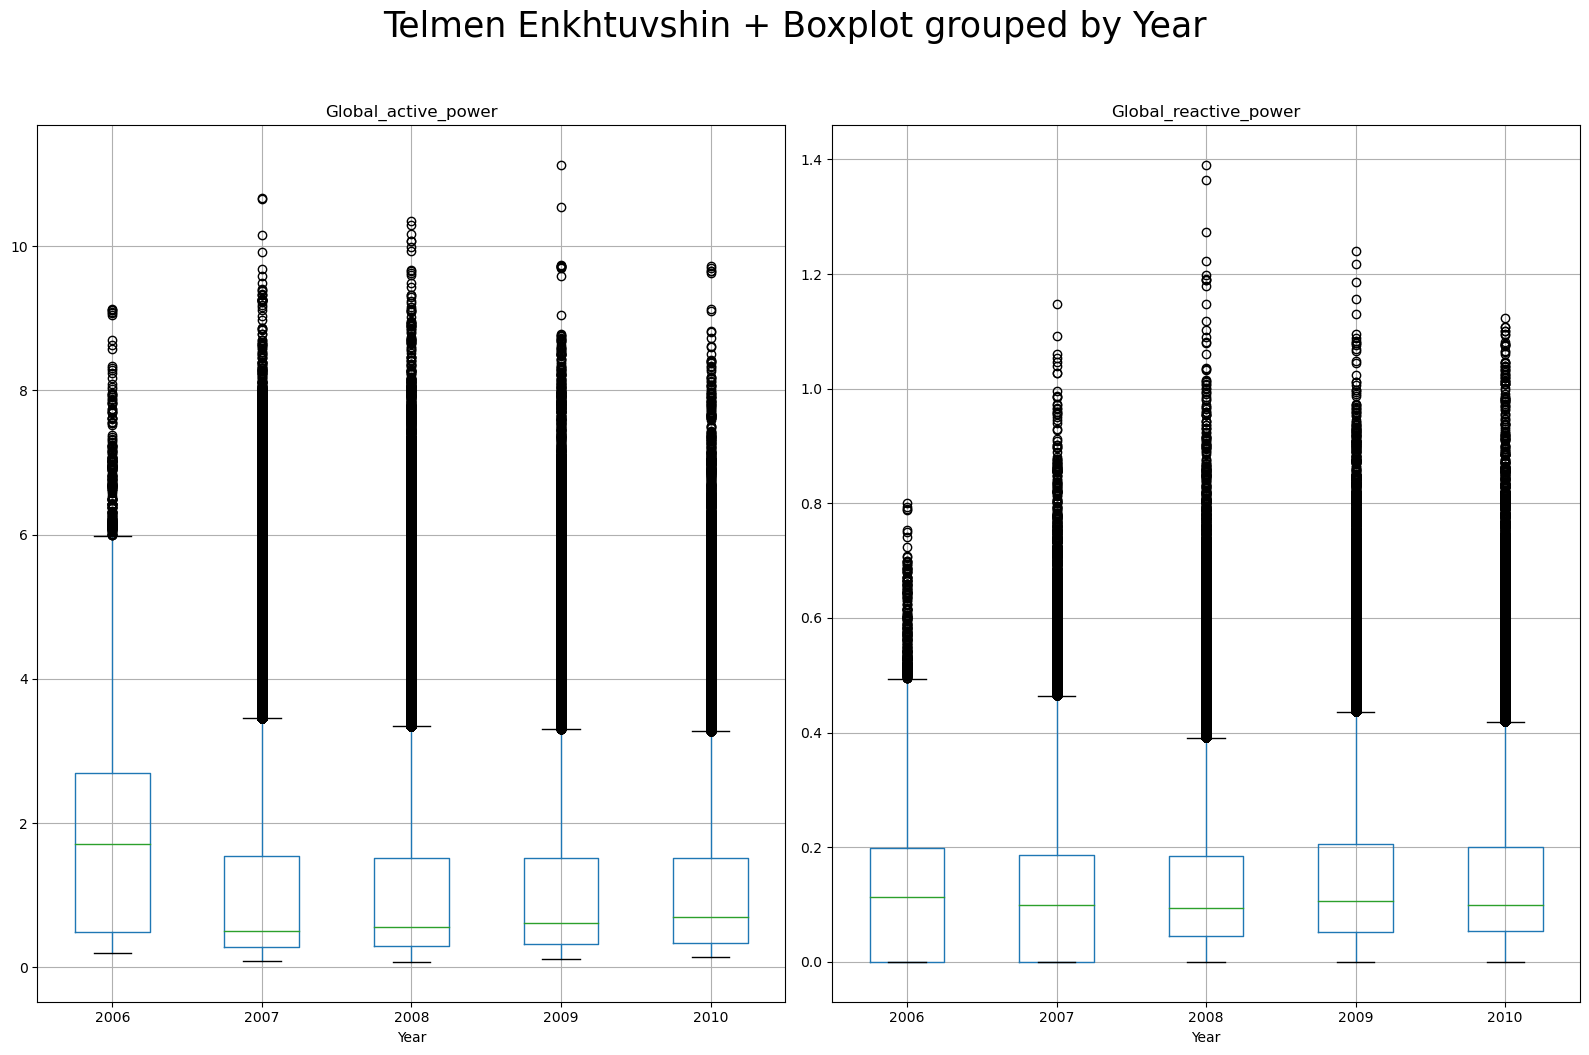

In [151]:
# Separate boxplot of iris attributes for each species
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

new_frame.boxplot(column=['Global_active_power', 'Global_reactive_power'],
                  by='Year', 
                  layout=(1, 2),
                  ax=axes);
plt.tight_layout()
plt.suptitle("Telmen Enkhtuvshin + Boxplot grouped by Year", fontsize=25, y=1.05)
plt.show()

In [153]:
# Saving plot
fig.savefig("TelmenEnkhtuvshin_Powerboxplot.png")

# Saving Visualizations

Under each plot, the graphs have been saved with unique names after rendering them on the page.